# Predicting Prices of Used Cars on Craigslist

# Feature Selection
Before we were want to determine only necessary vehicles for our study. Now we onyl want to contain necessary variables. The below description explains why we chose to drop certain variables to improve our model. 


## 1) Feature Selection: Dropping Categorical Variables
* We want to reduce the number of unnecessary variables. Below are some of the reasons:
* We eliminate categorical variables that are included in another variable (aka inter correlation)
    * Example Division, State, and region. As each state has only one division. Each region can only fit in one states
    * We eliminated type and Category as they both fit within Category_cleaned
* We Eliminate categorical variables that are either unique to each vehicle or have too many categories within it because that would create too many dummy variables 
    * There are over 10000 models and while models are not completely unique to each vehicle considering we are trying to determine the asking price when we don't know the value of the model it goes around the point of the study. However again it could be something to look into.
    * There are over 400 regions while this could be an interesting study we don't need it as we have division, longitude and latitude. It might be something to look into for another study
    * There are over 50 states while this could be an interesting study we don't need it as we have division, longitude and latitude. It might be something to look into for another study.
* We eliminate variables that have only one value as the don't add anything to the model
    * title status

In [370]:
#Get Path
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
file ='auto_data_pre_cleaned.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
auto_data= pd.read_csv(file_name_path)


C:\Users\Tiki\Documents\Sprinboard2\Capstone_cars
['.ipynb_checkpoints', '575_1100_compressed_data.csv', '575_1100_compressed_data.csv.zip', '62920_1026452_bundle_archive.zip', 'auto trimmed price.ipynb', 'auto1.ipynb', 'auto1_datawrangling.ipynb', 'auto2.ipynb', 'auto2_Combining Data.ipynb', 'auto3.ipynb', 'autoclean_pr_EDA_long.ipynb', 'autodata3_EDA.ipynb', 'autodata4-imputing Data.ipynb', 'autodata4-PCA.ipynb', 'autodata4.ipynb', 'auto_clean.ipynb', 'auto_clean_copy.ipynb', 'auto_clean_copy2-Copy1.ipynb', 'auto_clean_copy2.ipynb', 'auto_clean_copy2_sqrt.ipynb', 'auto_clean_copy3 State vs Region.ipynb', 'auto_clean_copy3- expand tuning.ipynb', 'auto_clean_copy4.ipynb', 'auto_clean_p1_cleandata.ipynb', 'auto_clean_p2_mergedata.ipynb', 'auto_clean_p3_impute_data.ipynb', 'auto_clean_p4_EDA.ipynb', 'CapstoneProjectSlides_example.pdf', 'correlation.png', 'correlation_large.png', 'cylinder_drive.png', 'cylinder_drive_mileage_price.png', 'data', 'Error 2021 Predictions plus Tesla.png', 'Er

In [371]:
auto_data.select_dtypes(exclude=['int64', 'float']).nunique()

region               402
manufacturer          38
model               8891
condition              5
fuel                   5
title_status           1
transmission           3
drive                  3
size                   4
type                  12
paint_color           13
state                 51
Category              38
State                 51
Division               9
State_Code            51
Category_Cleaned      11
dtype: int64

In [372]:
#drop categorical variables unique to each entry and/or having over 100 categories within
z2 =auto_data.drop(columns= ['model', 'id' ], axis=1)

##drop state due to combo of intercorrelation 
#z2 =z2.drop(columns= ['region', 'state', 'type', 'Category', 'State_Code', 'State ', 'year'], axis=1)

#drop long, lat due to combo of intercorrelation 
z2 =z2.drop(columns= ['region', 'long', 'lat', 'Division', 'type', 'Category', 'State_Code', 'State ', 'year'], axis=1)


#drop to having only 1 value
z2 =z2.drop(columns= ['title_status'], axis=1)

z2 =z2.drop(columns= ['resid'], axis=1)


In [373]:
z2['size' ]= z2['size'].fillna('unlisted')

In [374]:
#Dropping Nulls- We prefer our data to be without nulls with the exception of MSRP and resid there are few nulls so we eliminate those

z2= z2.dropna()


## Feature manipulation: Cylinders

Cylinders is an nominal variable. That means it is ordinal (1 cylinder < 2 cylinders) but it is non-continous (no such thing as  half a cylinder). This is hard to model. We can either treat it as a categorical varible or we can treat is numerical variable.

Treating cylinders as a categorical variable: 
Pro: No wrong assumptions
Con: Loss of ordering

Treating cylinders as a numerical variable: 
Pro:keep ordering information. It allows us to analyze the data using techniques that  is familiar and easily understandable.
Con: Incorrectly assumes continuosness

First we check if there is a relationship there between the ordinal variable and the dependent variable (Aka cylinders and price). We use a a spearman rank correlation. If that is signifcant we then change the variable into a categorical variable


In [375]:
#See if there i
from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(z2['price'], z2['cylinders'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)
z_cyl=z2[['price', 'cylinders']]
z_cyl['cylinders'] = z_cyl['cylinders'].astype('category')
z_cyl = pd.get_dummies(z_cyl)
plt.figure(figsize=(7,6))
sns.heatmap(z_cyl.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')
z_cyl.sum()
z2['cylinders'] = z2['cylinders'].astype('category')

Spearmans correlation coefficient: 0.511
Samples are correlated (reject H0) p=0.000


## Feature Selection: Dropping Continous Variables
### Eliminate variables due to intercorrelation

We check correlation between our features. We do not want highly correlated variables (aka correlation whose absolute value is of over 0.8 in our data). In our investigation we only find year which is highly correlated to age. We therefore eliminated year from our variables.

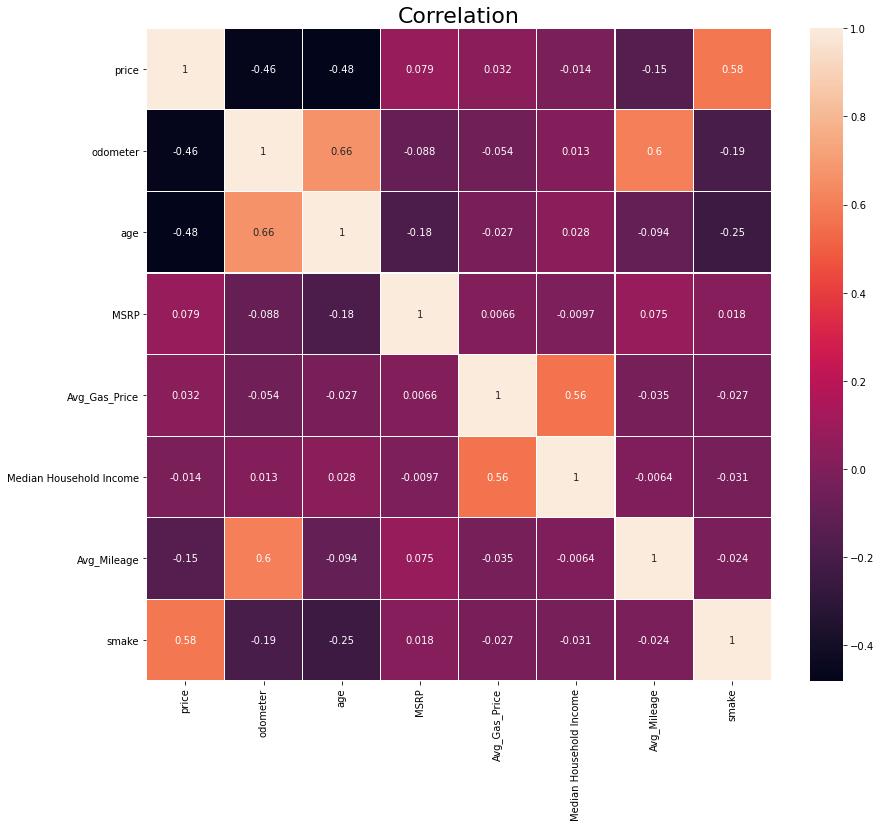

In [379]:
plt.figure(figsize=(14,12))
sns.heatmap(z2.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')

We note that there are no variables whose absolute correlation is over 0.8

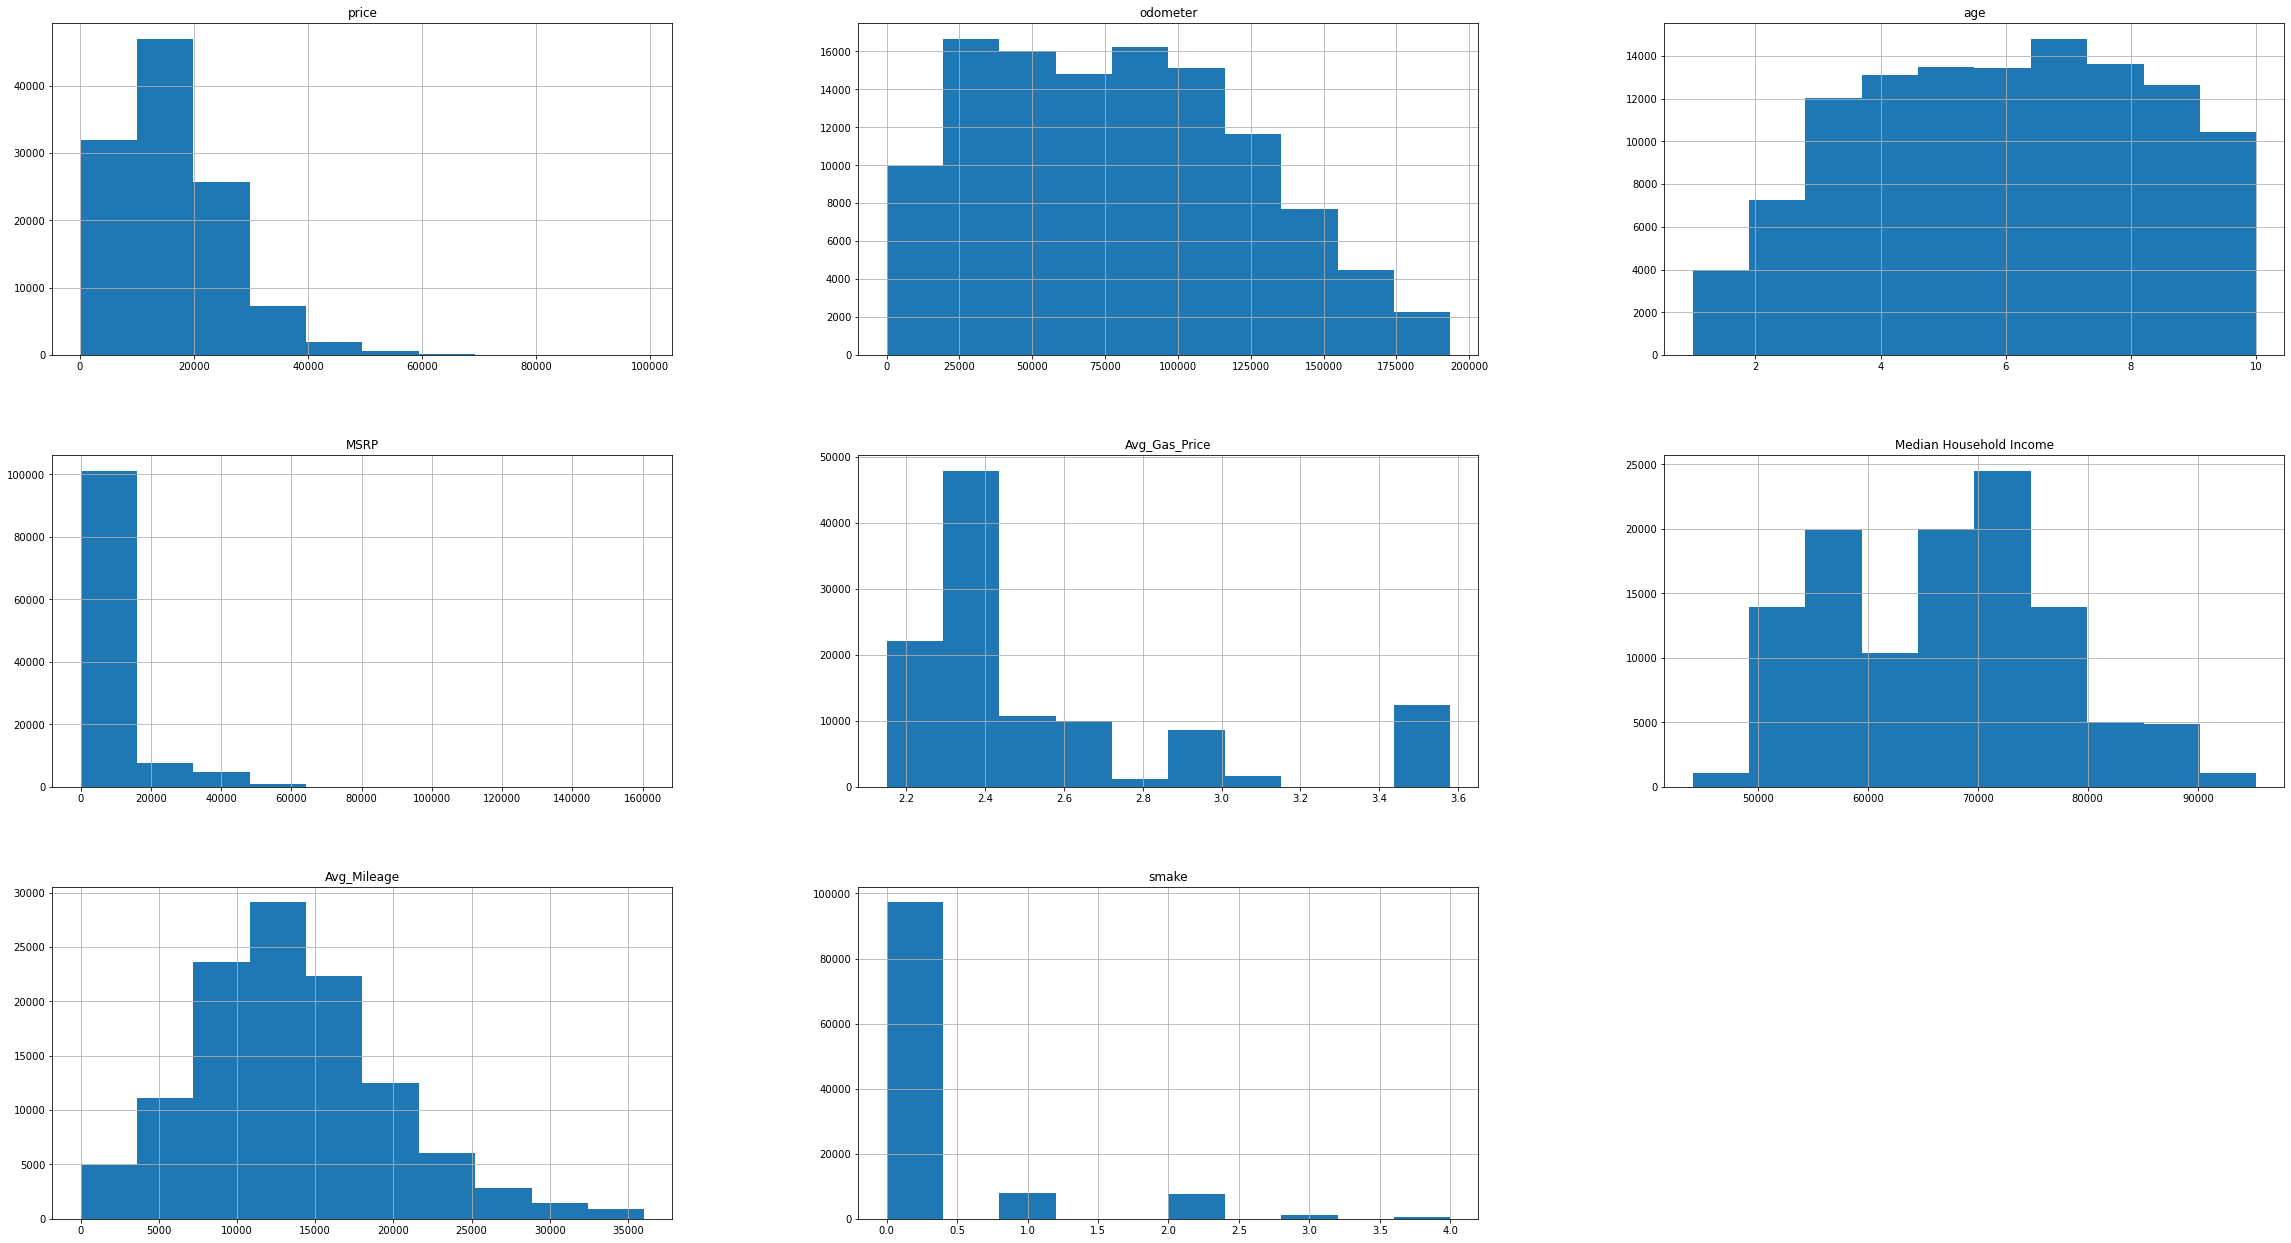

In [275]:

hist = z2.hist(figsize=(40,22))
#The data for price is and age are not a normal destribution so both normalize scaler is bad idea 

In [277]:
#save data

new_file = 'auto_data_cleaned.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
z2.to_csv(new_file_name_path, index=False)